교재 3장

선형 회귀

## 지난 시간 복습


머신러닝 알고리즘 : 지도 / 비지도 / 강화

지도 학습 : 분류 / 회귀

**분류** : 클래스 분류

**회귀** : 임의의 숫자 예측

---
**k-최근접 이웃 회귀 알고리즘** 사용

가까운 특정 수 만큼 이웃의 target에 해당하는 값의 평균을 사용


타겟과 예측값의 차를 활용한 지표를 사용 : 대표적으로 R 스퀘어(결정 계수)



타겟과 예측이 가까워짐 >> 결과가 1에 가까워짐

예측과 평균이 가까워짐 >> 결과가 0에 가까워짐


---



k(이웃의 수)를 조정하여 과대적합과 과소적합을 피해서 조정한다.
과소적합 ( 복잡도 낮음 )
과대적합 ( 복잡도 높음 )

## k-최근접 이웃 회귀의 단점 ( 취약점 )

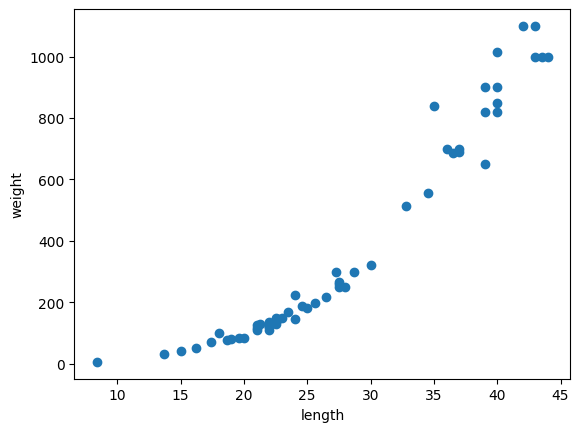

0.9828900820875252


In [54]:
import numpy as np
perch_length = np.array(
            [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
             21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
             22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
             27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
             36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
             40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
             )
perch_weight = np.array(
            [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
             110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
             130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
             197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
             514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
             820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
             1000.0, 1000.0]
             )

import matplotlib.pyplot as plt

plt.scatter(perch_length, perch_weight)
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=20)

train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors = 3)
knr.fit(train_input, train_target)
print(knr.score(test_input, test_target))

In [55]:
print(knr.predict([[50]]))

[1033.33333333]


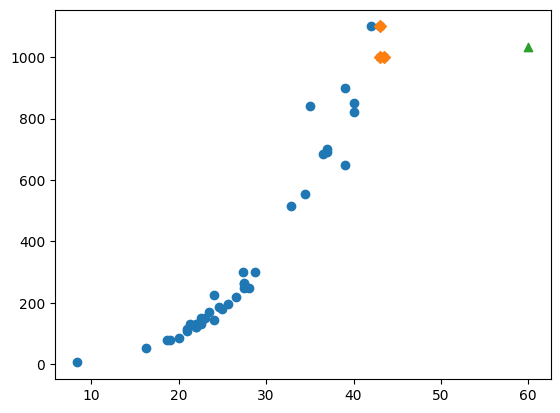

In [56]:
distances, indexes = knr.kneighbors([[50]])

plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes],marker='D')
plt.scatter(60,1033,marker='^')
plt.show()

**k-최근접 이웃 회귀의 단점**

훈련 세트 범위 밖의 샘플을 예측하기가 어렵다.


위와 같은 문제를 해결하기 위해

길이나 무게가 늘어났을 때, 추세를 따라갈 수 있는 **선형 회귀**를 알아보자



## 선형 회귀

선형 회귀 linear regression

**로지스틱 회귀**와 **신경망**도 **선형 회귀를 기반**으로 한다.

특성이 많을 때 강력한 성능을 볼 수 있음 >> 실전에 많이 쓰임.


---


지금 예제 자료와 같이 특성을 하나만 훈련할 때 (length) 직선의 방정식을 사용한다.

추세를 따라가는 1차 방정식을 찾는게 핵심이다.

In [57]:
from sklearn.linear_model import LinearRegression

In [58]:
lr = LinearRegression()
lr.fit(train_input, train_target)

print(lr.predict([[50]]))

[1199.31561994]


In [59]:
# 마지막에 _가 있으면 모델에서 알아서 학습한 것.
# coef_ : 기울기 >> 특성의 수만큼 나타나짐 >> 1차원 배열 꼴로 나타내진다.
# intercept_ : y 절
print(lr.coef_, lr.intercept_)

[37.5863886] -680.0038098677996


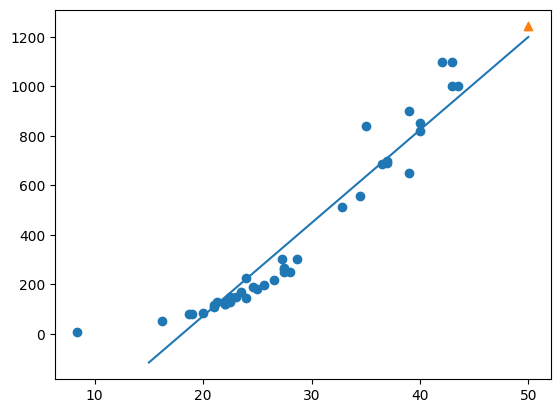

In [60]:
# 샘플의 위치
plt.scatter(train_input, train_target)

# 선형회귀를 통해 나타내진 1차 방정식
plt.plot([15,50],[15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])

# 예측값 지점
plt.scatter(50, 1241.8, marker='^')
plt.show()

In [61]:
# 결과가 차이가 난다 ( test가 낮음 )
# 과소적합이라고 예상할 수 있다.
# k-최근접 이웃 회귀보다 낮은 train값 >> 과소적합

# 0 일 때의 값이 음수 >> 값이 작으면 음수가 나올 수 있음. (y절편이 음수인걸 봐도 알 수 있다.)

print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.9120955317364234
0.9283284879161142


데이터의 과소적합이나 과대적합 등 적절한지 보기 위해서는 다양한 모델을 사용한 결과를 비교하면서 파악하는 것이 좋다.

샘플들을 봤을 때, 직선이 아니라 굴곡진 것을 확인할 수 있음

직선(1차) 아니라 2차 함수로 나타내면 더 좋은 결과를 볼 수 있지 않을까 하는 예상을 할 수 있다.

## 다항 회귀

2차 방정식을 생각할 수 있음.
각 계수 (a,b,c)를 파악

x의 다항식을 사용 >> 다항 회귀

따로 지원하지는 않고, 제곱을 통해서 구현할 수 있음

In [62]:
# X^2 , X 행렬을 만들 수 있음 (제곱은 둘 중 하나만 주면 된다. 대신 열을 맞춰서)
train_poly = np.column_stack((train_input**3, train_input**2, train_input))
test_poly = np.column_stack((test_input**3, test_input**2, test_input))

In [63]:
# 모델을 다항으로해서 다시 훈련

lr = LinearRegression()
lr.fit(train_poly, train_target)

# 제곱항을 해야함! (제곱의 위치 맞춰서)
print(lr.predict([[50**3,50**2,50]]))

[1497.59726346]


In [64]:
# 2차 다항식의 계수와 상수라고 생각하면 편할 듯
print(lr.coef_, lr.intercept_)

[-7.32138627e-03  1.59340749e+00 -3.57849284e+01] 218.49823428766592


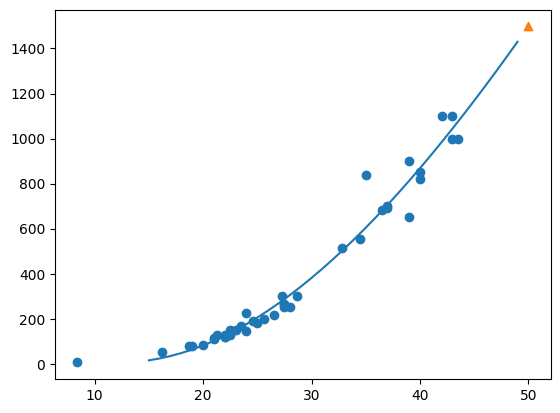

In [65]:
# x
point = np.arange(15,50)

plt.scatter(train_input, train_target)

# x에 해당하는 y > 각 지점을 이어준다.
# 아주 작은 직선을 여러 개 이어주도록 만들기
plt.plot(point, lr.coef_[0]*point**3+lr.coef_[1]*point**2+lr.coef_[2]*point + lr.intercept_)

# 예측할 지점 생성
plt.scatter([50], lr.predict([[50**3,50**2,50]]),marker='^')
plt.show()

In [66]:
# 선형회귀보다 점수가 높
# test가 높음 >> 과소적합
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9710050916000177
0.9778755705592226


다중 회귀 >> 특성이 많아지면 그래프로 표현하기가 힘들어진다.

따라서 score의 결과만을 통해서 추축할 수 있으면 좋다.